In [5]:
# System related and data input controls
import os

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Library
import pandas as pd
import numpy as np
import math

# Visualization
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 한글 설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [14]:
FILE_PATH = '../dataset/실습데이터.csv'

df = pd.read_csv(FILE_PATH, parse_dates=['Timestamp'])
print("✅ 데이터 로드 성공.")
print("original shape: ", df.shape)

✅ 데이터 로드 성공.
original shape:  (579297, 57)


In [15]:
df.columns = df.columns.str.replace('.xlsx', '', regex=False)

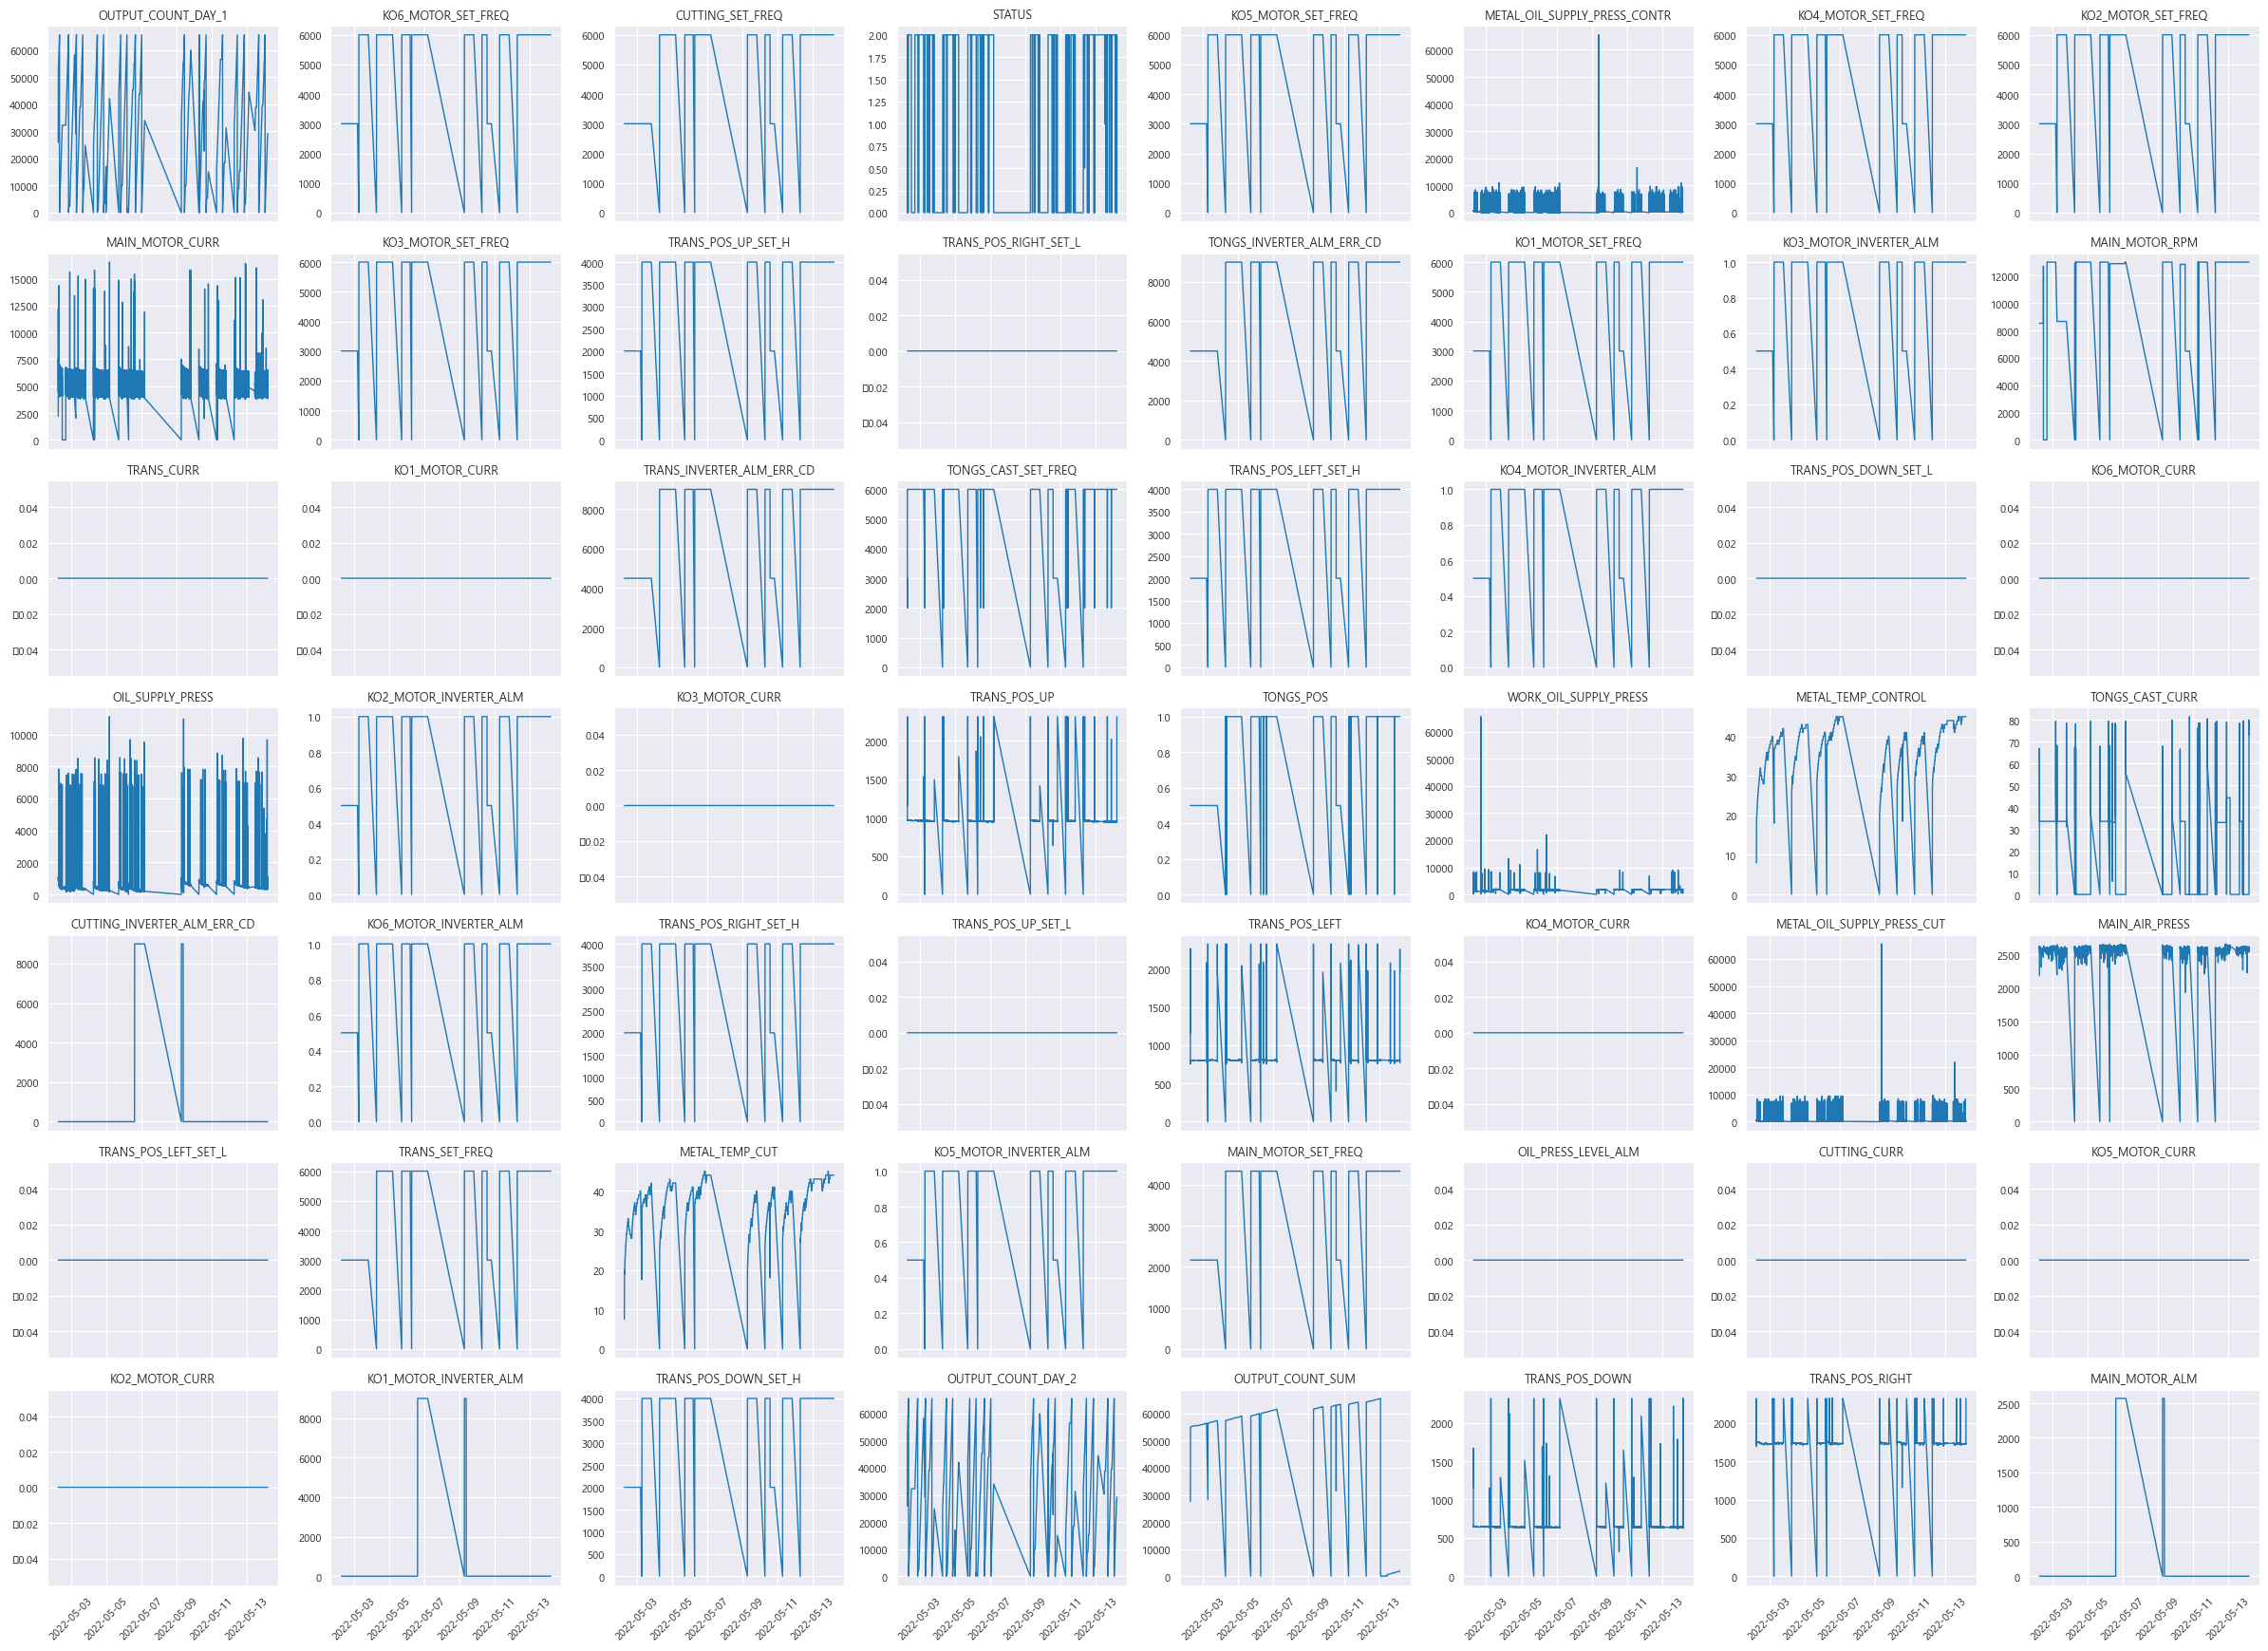

In [16]:
# 3. Timestamp를 인덱스로 설정
df = df.set_index('Timestamp')

# 4. 그래프 설정
num_cols = len(df.columns)
cols_per_row = 8
num_rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(24, num_rows * 2.5), sharex=True)
axes = axes.flatten()  # 2차원 배열을 1차원으로

# 5. 각 컬럼별로 선 그래프 그리기
for i, col in enumerate(df.columns):
    axes[i].plot(df.index, df[col], linewidth=1)
    axes[i].set_title(col, fontsize=9)
    axes[i].tick_params(axis='x', labelrotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# 6. 남는 subplot 숨기기
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

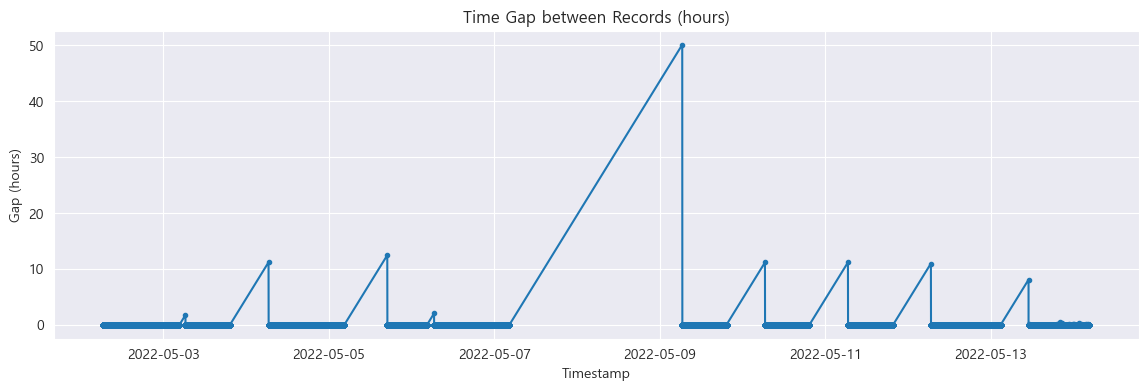

끊긴 구간 수: 9


In [25]:
# 1. 인접한 시점 간 시간 간격 계산
df['time_diff'] = df.index.to_series().diff()

# 2. 시간 간격 시각화
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['time_diff'].dt.total_seconds() / 3600, marker='o', markersize=3)
plt.title('Time Gap between Records (hours)')
plt.ylabel('Gap (hours)')
plt.xlabel('Timestamp')
plt.show()

# 3. 끊긴 구간 개수
threshold = pd.Timedelta(hours=0.5)  # 예: 30분 이상이 넘으면 끊겼다고 판단
gaps = df[df['time_diff'] > threshold]
print("끊긴 구간 수:", len(gaps))


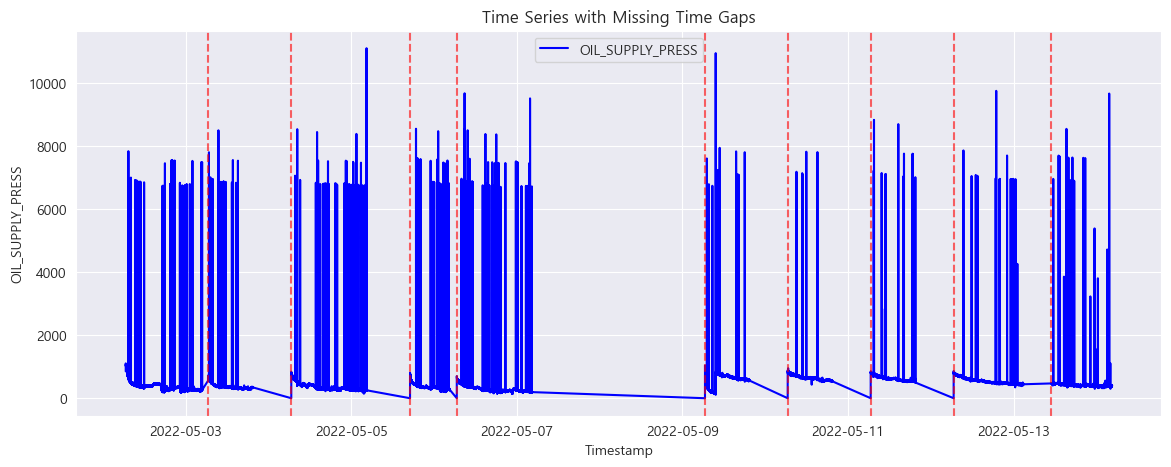

In [20]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['OIL_SUPPLY_PRESS'], color='blue', label='OIL_SUPPLY_PRESS')

# 끊긴 구간 표시
for gap_time in gaps.index:
    plt.axvline(x=gap_time, color='red', linestyle='--', alpha=0.6)

plt.title('Time Series with Missing Time Gaps')
plt.xlabel('Timestamp')
plt.ylabel('OIL_SUPPLY_PRESS')
plt.legend()
plt.show()


In [26]:
# 1. 끊긴 구간 탐지
threshold = pd.Timedelta(hours=0.5)
gaps = df[df['time_diff'] > threshold]

# 2. 각 끊긴 구간의 시작/끝/시간 차이 계산
gap_info = []
for gap_time in gaps.index:
    start_time = df.index[df.index.get_loc(gap_time) - 1]  # 끊기기 전 마지막 시점
    end_time = gap_time                                   # 끊긴 후 첫 시점
    gap_duration = end_time - start_time
    gap_info.append({
        'Gap Start': start_time,
        'Gap End': end_time,
        'Gap Duration': gap_duration
    })

# 3. DataFrame으로 보기 좋게 출력
gap_df = pd.DataFrame(gap_info)
print("🔴 끊긴 구간 요약:")
print(gap_df)

# 4. 총 손실 시간 요약
total_gap = gap_df['Gap Duration'].sum()
print(f"\n⏱ 총 끊긴 시간: {total_gap}")

🔴 끊긴 구간 요약:
            Gap Start             Gap End    Gap Duration
0 2022-05-03 04:43:32 2022-05-03 06:27:02 0 days 01:43:30
1 2022-05-03 19:22:48 2022-05-04 06:33:18 0 days 11:10:30
2 2022-05-05 04:32:45 2022-05-05 16:59:24 0 days 12:26:39
3 2022-05-06 04:31:53 2022-05-06 06:32:53 0 days 02:01:00
4 2022-05-07 04:24:51 2022-05-09 06:31:30 2 days 02:06:39
5 2022-05-09 19:22:10 2022-05-10 06:30:37 0 days 11:08:27
6 2022-05-10 19:25:08 2022-05-11 06:34:40 0 days 11:09:32
7 2022-05-11 19:40:51 2022-05-12 06:38:00 0 days 10:57:09
8 2022-05-13 02:53:11 2022-05-13 10:57:08 0 days 08:03:57

⏱ 총 끊긴 시간: 4 days 22:47:23


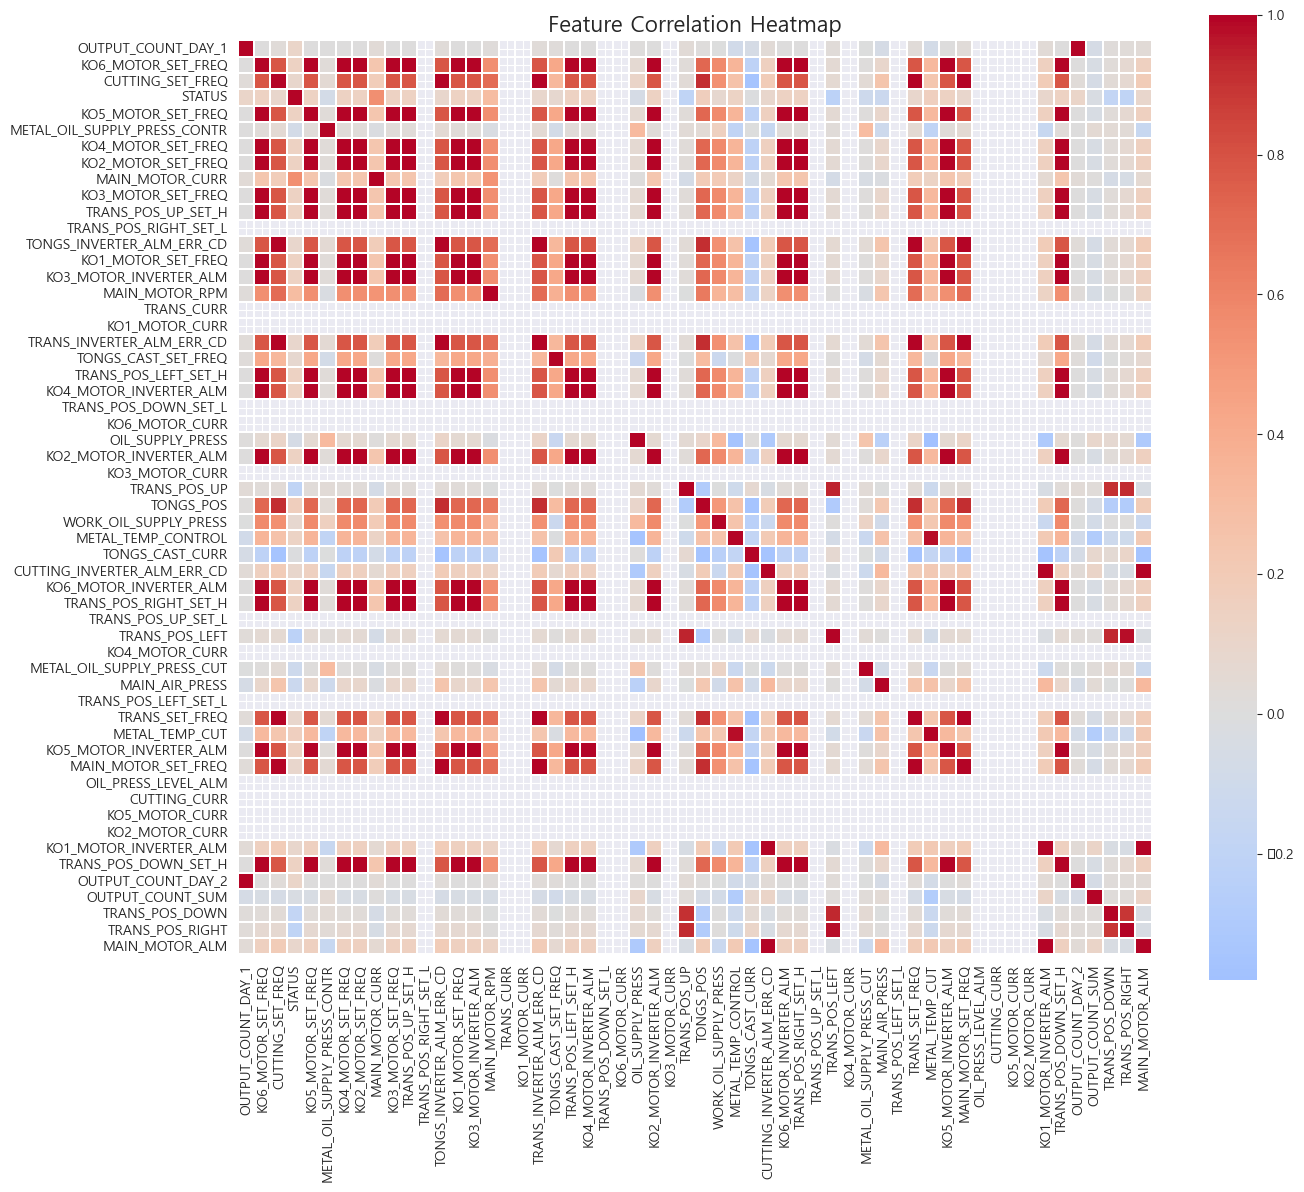

In [7]:
# 2. Timestamp 제외 (상관계수는 숫자형 데이터만)
df_numeric = df.select_dtypes(include=['number'])

# 3. 상관계수 계산
corr = df_numeric.corr()

# 4. 히트맵 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True,
            annot=False, fmt='.2f', linewidths=0.3)

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()